Time series analysis and sales data forecast using ARIMA and SARIMAX

In [1]:
import pandas as pd 

filex= pd.read_csv("S:\Python for DS\perrin-freres-monthly-champagne-.csv", encoding="latin1")
filex.head(5)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [2]:
filex.columns=["Month","Units_sold"]
filex.head(3)

,Month,Units_sold
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0


In [3]:
filex.drop(105, inplace=True) #dropping noisy samples of dataset
filex.drop(106, inplace=True)

In [4]:
filex['Month']=pd.to_datetime(filex['Month']) #cnversion to full date format
filex.head(3)

,Month,Units_sold
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0


In [5]:
filex.set_index("Month", inplace=True)

<AxesSubplot:xlabel='Month'>

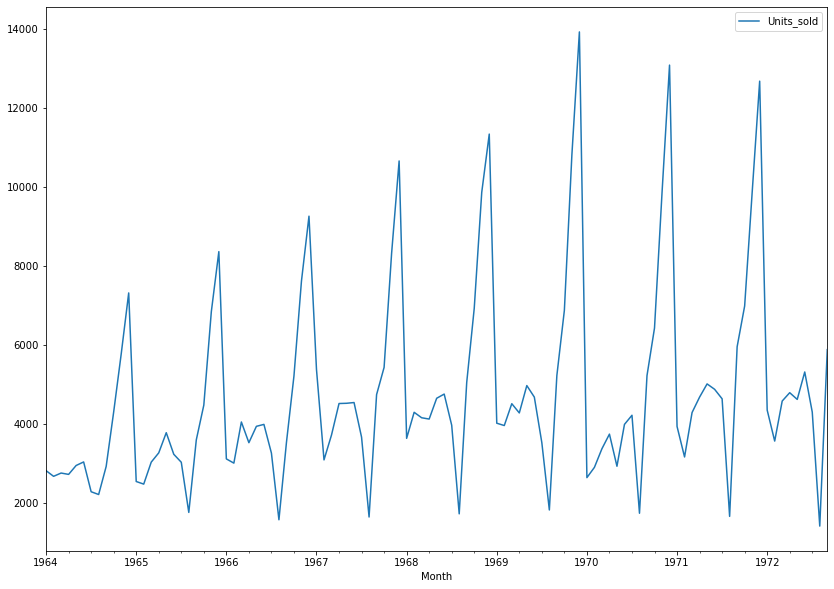

In [6]:
import matplotlib.pyplot as plt
filex.plot(figsize=(14,10))

In [7]:
from statsmodels.tsa.stattools import adfuller

#H0= Sales data is not stationary
#H1= Sales data is stationary

hypo= adfuller(filex["Units_sold"])

def hypo_test(Units_sold):
    outcome=adfuller(Units_sold)
    labels=['adfuller value','P value','lags','observations count'] #lags=past values' intervals
    
    for value,labels in zip(outcome,labels):
        print(labels+ "-->"+ str(value))
    if outcome[1]<= 0.05:
        print("H0 rejected and data is stationary")
    else:
        print("H1 rejected and data is non-stationary")
        
hypo_test(filex["Units_sold"])

adfuller value-->-1.8335930563276195
P value-->0.3639157716602467
lags-->11
observations count-->93
H1 rejected and data is non-stationary


In [8]:
filex["full season difference"]= filex["Units_sold"]- filex["Units_sold"].shift(12)
# filex.rename(columns={"1 full season difference":"Full season difference"}, inplace=True)
# filex.drop(filex.columns[2], inplace=True,axis=1)
filex.head(3)

,Units_sold,full season difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN


In [9]:
hypo2= adfuller(filex["full season difference"].dropna())
print("P values is below 0.05, H1 accepted and data is stationary")
hypo2

P values is below 0.05, H1 accepted and data is stationary


(-7.626619157213166,
 2.0605796968136632e-11,
 0,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 1294.7753384560438)

Auto Regression

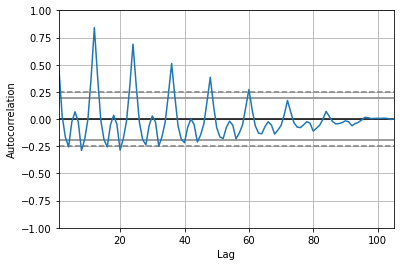

In [10]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(filex['Units_sold'])
plt.show()

C:\Users\mahaj\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


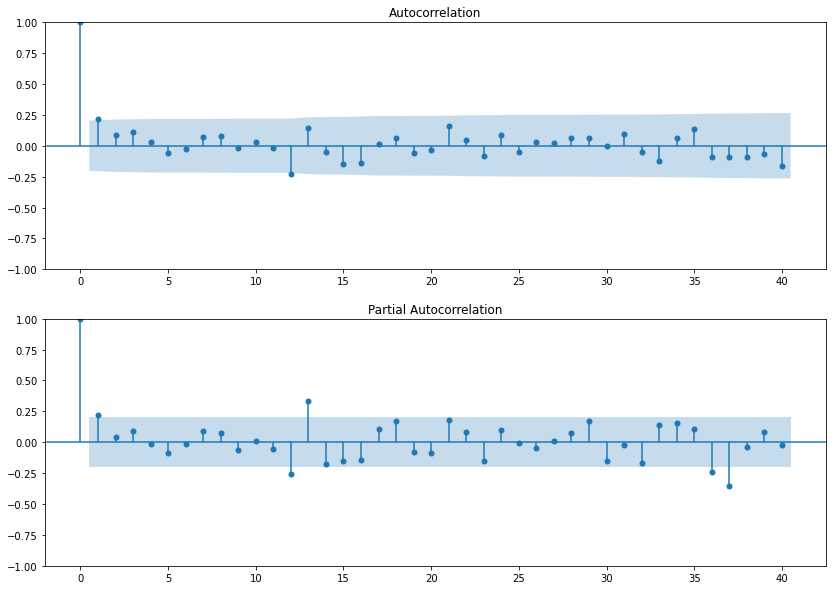

In [11]:
#using auto correlation and partial auto correlation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

graph= plt.figure(figsize=(14,10))
axisA=graph.add_subplot(211)
graph=sm.graphics.tsa.plot_acf(filex['full season difference'].dropna(),lags=40, ax=axisA) #dropping first 12 null vals
axisB=graph.add_subplot(212)
graph=sm.graphics.tsa.plot_pacf(filex['full season difference'].dropna(),lags=40, ax=axisB)


In [12]:
from statsmodels.tsa.arima.model import ARIMA

#selecting p(AR lags)=1, d(difference)=1 and q(moving avg lags)= 0 or 1 for order

arima_imp= ARIMA(filex['Units_sold'], order=(1,1,1))
fitting= arima_imp.fit()
fitting.summary() 

C:\Users\mahaj\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mahaj\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mahaj\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Units_sold   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Sun, 22 Jan 2023   AIC                           1911.627
Time:                        17:59:17   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
#seasonal ARIMAX, consider 12 month is 1 season

sarimax_imp= sm.tsa.statespace.SARIMAX(filex['Units_sold'], order=(1,0,1), seasonal_order= (1,1,1,12))
fitting2= sarimax_imp.fit()

C:\Users\mahaj\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mahaj\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

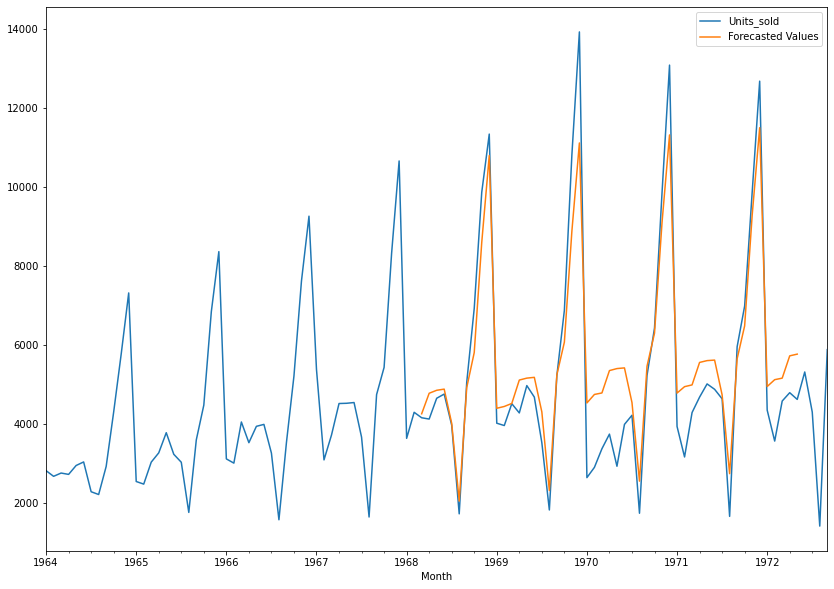

In [16]:
#plottin the forecast

filex['Forecasted Values']= fitting2.predict(start= 50, end= 100, dynamic= True)
filex[['Units_sold', 'Forecasted Values']]. plot(figsize= (14,10))

In [ ]:
#Definitions:

#ARIMA(Auto-Regressive Integrated Moving Average) and SARIMAX(Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors). 
#Autoregressive integrated moving average model is a generalization of an autoregressive moving average model. It is a statistical analysis model that 
#uses time series 
#data to either better understand the data set or to predict future trends.

#Autoregression: model to predict values based on only one variable that is lags(past values)

#Autocorrelation and Partial Autocorrelation: measures of association between current and past series values and indicate which past series values 
#are most useful in predicting future values=determine connections between the observed results at different observation times of a measurement series. 
#They are measures of association between current and past series values and indicate which past series values are most useful in predicting future values.



In [15]:
#Ashutosh Mahajan